STEPS:

**1.** upload file to Google drive

**2.** Click on mount drive button and mount googledrive

In [159]:
from google.colab import drive

In [160]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [161]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Project_DB/Car details v3.csv")

In [162]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [163]:
df.shape

(8128, 13)

In [164]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [166]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Observations:

**1.** Null values are present in mileage, engine, max_power,torque,seats.

**2.** Data is from year 1983 to 2020

**3.** Presence of outliers in numerical var namely year, selling price, km_driven, seats.

In [167]:
##null values cleaning
df["engine"].isnull().sum() ##221
df['engine'].value_counts()
print(df["engine"].isnull().sum())#221

# df["engine"].str.split(" CC")
df[["new_engine","engine_unit"]] = df["engine"].str.split(" ",0,expand = True)
# print("old ngine",df["engine"].value_counts())
# print("new engine",df["new_engine"].value_counts())

221


<ipython-input-167-22603043f78f>:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["new_engine","engine_unit"]] = df["engine"].str.split(" ",0,expand = True)


In [168]:
##null values cleaning
df["mileage"].isnull().sum() ##393
df['mileage'].value_counts()
print(df["mileage"].isnull().sum())#221

# df['new_new_mileage'] = [x.strip(" ") for x in df['mileage']]
# df

# df["engine"].str.split(" CC")
df[["new_mileage","mileage_unit"]] = df["mileage"].str.split(" ",0,expand = True)
df
# # print("old ngine",df["engine"].value_counts())
# # print("new engine",df["new_engine"].value_counts())

221


<ipython-input-168-4e07f25e4d96>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["new_mileage","mileage_unit"]] = df["mileage"].str.split(" ",0,expand = True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_engine,engine_unit,new_mileage,mileage_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248,CC,23.4,kmpl
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498,CC,21.14,kmpl
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497,CC,17.7,kmpl
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396,CC,23.0,kmpl
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298,CC,16.1,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1197,CC,18.5,kmpl
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,1493,CC,16.8,kmpl
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1248,CC,19.3,kmpl
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1396,CC,23.57,kmpl


In [169]:
 ##null values cleaning
df["max_power"].isnull().sum() ##393
df['max_power'].value_counts()
print(df["max_power"].isnull().sum())#221
df['max_power']
df[["new_max_power","max_power_unit"]] = df["max_power"].str.split(" ",0,expand = True)
# df[["new_max_power","max_power_unit"]] = int(df["max_power"].str.split(" ",0,expand = True))
df.head()
# print("old ngine",df["engine"].value_counts())
# print("new engine",df["new_engine"].value_counts())

215


<ipython-input-169-50604e57fca3>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["new_max_power","max_power_unit"]] = df["max_power"].str.split(" ",0,expand = True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_engine,engine_unit,new_mileage,mileage_unit,new_max_power,max_power_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248,CC,23.4,kmpl,74,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498,CC,21.14,kmpl,103.52,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497,CC,17.7,kmpl,78,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396,CC,23.0,kmpl,90,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298,CC,16.1,kmpl,88.2,bhp


In [170]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'new_engine', 'engine_unit', 'new_mileage', 'mileage_unit',
       'new_max_power', 'max_power_unit'],
      dtype='object')

In [171]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [172]:

df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'new_engine', 'engine_unit', 'new_mileage', 'mileage_unit',
       'new_max_power', 'max_power_unit'],
      dtype='object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   object 
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  new_engine      7907 non-null   object 
 14  engine_unit     7907 non-null   object 
 15  new_mileage     7907 non-null   object 
 16  mileage_unit    7907 non-null   object 
 17  new_max_power   7913 non-null   o

In [174]:
df['new_engine'] = pd.to_numeric(df['new_engine'])
df['new_mileage'] = pd.to_numeric(df['new_mileage'])
df['new_max_power'] = pd.to_numeric(df['new_max_power'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   object 
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  new_engine      7907 non-null   float64
 14  engine_unit     7907 non-null   object 
 15  new_mileage     7907 non-null   float64
 16  mileage_unit    7907 non-null   object 
 17  new_max_power   7912 non-null   f

In [175]:
df.describe()

,year,selling_price,km_driven,seats,new_engine,new_mileage,new_max_power
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000,7912.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719,1458.625016,19.418783,91.517919
std,4.044249,8.062534e+05,5.655055e+04,0.959588,503.916303,4.037145,35.822499
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,624.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,1197.000000,16.780000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,1248.000000,19.300000,82.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,1582.000000,22.320000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,3604.000000,42.000000,400.000000


In [176]:
df['new_engine'].isnull().sum()

221

In [177]:
# missing_values = df.isnull().sum()
# missing_values = missing_values[missing_values>0]
# missing_percent =  round(missing_values/len(df) , 4)*100
# pd.DataFrame({"Number of missing values":missing_values, "Percentage": missing_percent})

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   object 
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  new_engine      7907 non-null   float64
 14  engine_unit     7907 non-null   object 
 15  new_mileage     7907 non-null   float64
 16  mileage_unit    7907 non-null   object 
 17  new_max_power   7912 non-null   f

# Here note that since we have already taken care of engine(in CC) , mileage and maxpower we will only consider new version of those features. so we will drop columns **mileage** , **engine** and **maxpower** columns for simplicity.
Also remove the units columns from df

In [179]:
df1 = df.drop(['engine','mileage','max_power','mileage_unit','max_power_unit','engine_unit'], axis =1)
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,new_engine,new_mileage,new_max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,1248.0,23.40,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,1498.0,21.14,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,1497.0,17.70,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,1396.0,23.00,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,1298.0,16.10,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,113.7Nm@ 4000rpm,5.0,1197.0,18.50,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,"24@ 1,900-2,750(kgm@ rpm)",5.0,1493.0,16.80,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,1248.0,19.30,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,140Nm@ 1800-3000rpm,5.0,1396.0,23.57,70.00


## 1.a checking which numerical variables are categorical



Step1: finidng number of unique values to identify categorical variable

In [180]:
# Extract numerical and non-numerical columns
numerical_col = df1.select_dtypes(include=['int64', 'float64']).columns
non_numerical_col = df1.select_dtypes(exclude=['int64', 'float64']).columns
print("numerical columns are:",numerical_col)
print("non numerical columns are",non_numerical_col)
print(len(numerical_col)+len(non_numerical_col), df1.shape)

numerical columns are: Index(['year', 'selling_price', 'km_driven', 'seats', 'new_engine',
       'new_mileage', 'new_max_power'],
      dtype='object')
non numerical columns are Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], dtype='object')
13 (8128, 13)


Step2: Set a threshold to differentiate categorical variable

In [181]:
for column in df1[numerical_col]:
    unique_count = df1[column].nunique()
    print(column, unique_count)

year 29
selling_price 677
km_driven 921
seats 9
new_engine 121
new_mileage 381
new_max_power 319


In [182]:
categorical_threshold =9  # You can adjust this threshold based on your data

continuous_numerical_vars = []
categorical_numerical_vars = []

# Loop through the columns to classify variables
for column in df[numerical_col]:
    unique_count = df[column].nunique()

    if unique_count <= categorical_threshold:
        categorical_numerical_vars.append(column)
    else:
        continuous_numerical_vars.append(column)

In [183]:
print(categorical_numerical_vars)

['seats']


### 1.b Checking which non numeric variables are categorical




Step1: finidng number of unique values to identify categorical variable

In [184]:
for column in df1[non_numerical_col]:
    unique_count = df1[column].nunique()
    print(column, unique_count)

name 2058
fuel 4
seller_type 3
transmission 2
owner 5
torque 441


In [185]:
for column in df1[non_numerical_col]:
    unique_count = df1[column].nunique()
    print(column, unique_count)

name 2058
fuel 4
seller_type 3
transmission 2
owner 5
torque 441


In [186]:
df1['fuel'].value_counts(), df1['seller_type'].value_counts(),df1['transmission'].value_counts(),df1['owner'].value_counts()

(Diesel    4402
 Petrol    3631
 CNG         57
 LPG         38
 Name: fuel, dtype: int64,
 Individual          6766
 Dealer              1126
 Trustmark Dealer     236
 Name: seller_type, dtype: int64,
 Manual       7078
 Automatic    1050
 Name: transmission, dtype: int64,
 First Owner             5289
 Second Owner            2105
 Third Owner              555
 Fourth & Above Owner     174
 Test Drive Car             5
 Name: owner, dtype: int64)

In [187]:
categorical_threshold =5  # You can adjust this threshold based on your data

continuous_numerical_vars = []
categorical_numerical_vars = []

# Loop through the columns to classify variables
for column in df1[numerical_col]:
    unique_count = df1[column].nunique()

    if unique_count <= categorical_threshold:
        categorical_numerical_vars.append(column)
    else:
        continuous_numerical_vars.append(column)

In [188]:
print(categorical_non_numerical_vars)

['fuel', 'seller_type', 'transmission', 'owner']


In [189]:
categorical_vars = categorical_numerical_vars + categorical_non_numerical_vars
len(categorical_vars)

4

In [201]:
continous_vars = continuous_non_numerical_vars+ continuous_numerical_vars
print(continous_vars)
len(continous_vars)

['name', 'torque', 'year', 'selling_price', 'km_driven', 'seats', 'new_engine', 'new_mileage', 'new_max_power']


9

In [191]:
len(df1.columns)
print(9+4)
print(len(df1.columns))

13
13


Before proceeding lets do the data validation.

## 2. Data Cleaning:

### 2.1 Continous variables

#### 1.Name

In [192]:
df1['name'].value_counts().sum()

8128

In [193]:
df1['name'].value_counts(sort = True)

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [194]:
# df1["BrandName"] = df1["name"].str.split(" ",0,expand = True)
# df1.colummns()
# df[["BrandName","NameDetails"]] = df1["name"].str.split(" ",0,expand = True)
df1['name'].nunique()

2058

This is a data of 2058 different cars. This column does not need cleaning.

### 2. torque

In [203]:
df1['torque'].nunique()
df1['torque'].head(10)

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
5           113.75nm@ 4000rpm
6        7.8@ 4,500(kgm@ rpm)
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
9              160Nm@ 2000rpm
Name: torque, dtype: object

We need to drop this column it has uneven data. Like there is no pattern found in the data.

In [212]:
df1 = df1.drop(['torque'],axis =1)

3. year

{'whiskers': [<matplotlib.lines.Line2D at 0x7d30b5060580>,
 'caps': [<matplotlib.lines.Line2D at 0x7d30b50609a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d30b50602e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d30b5060ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d30b5061180>],
 'means': []}

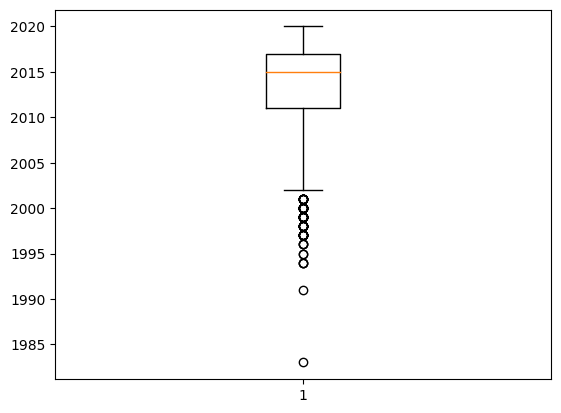

In [195]:
df1['year'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.year)


In [196]:
import numpy as np
column = 'year'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 1.00%


In [197]:
df1[column].quantile([0,.0001,.0001,.0002,.0003,.0004,.0005,.0006,.0007,.0008,.0009])

0.0000    1983.0000
0.0001    1989.5016
0.0001    1989.5016
0.0002    1992.8762
0.0003    1994.0000
0.0004    1994.0000
0.0005    1994.0635
0.0006    1994.8762
0.0007    1995.0000
0.0008    1995.5016
0.0009    1996.0000
Name: year, dtype: float64

In [198]:
df1['new_year']=df1['year']
mask1 =df1['year']<1992
df1['new_year'][mask1]=df1['year'].median()


<ipython-input-198-2ae8d3bce8e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_year'][mask1]=df1['year'].median()


{'whiskers': [<matplotlib.lines.Line2D at 0x7d30b4e7d120>,
 'caps': [<matplotlib.lines.Line2D at 0x7d30b4e7d690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d30b4e7cfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d30b4e7dbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d30b4e7de70>],
 'means': []}

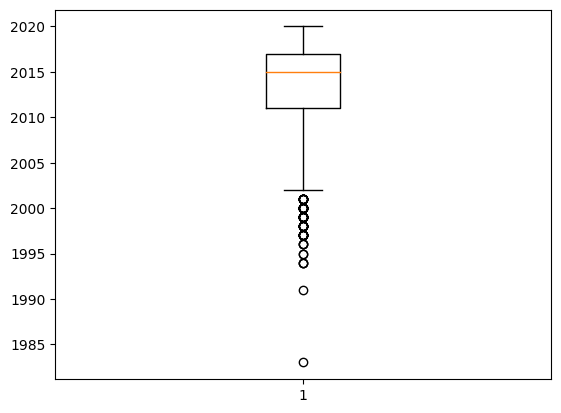

In [199]:
df1['year'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.year)


No further cleani g required.

4. selling price

In [206]:
df1['selling_price'].isnull().value_counts()


False    8128
Name: selling_price, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d30b4dbceb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d30b4dbd3f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d30b4dbcc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7d30b4dbd930>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d30b4dbdbd0>],
 'means': []}

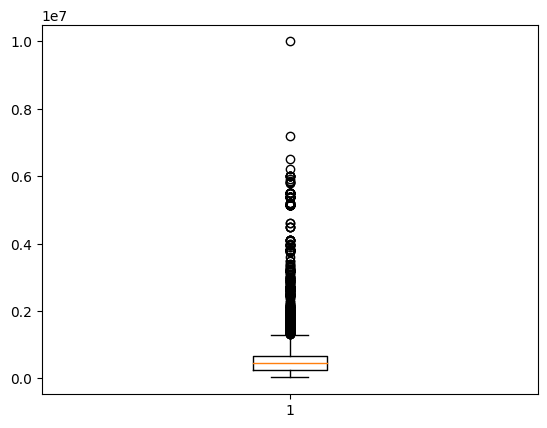

In [207]:
df1['selling_price'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.selling_price)


In [208]:
import numpy as np
column = 'selling_price'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 7.38%


In [210]:
df1[column].quantile([.90,.91,.92,.93,.94,.95,.95,.96,.97,.98,.99,1])

0.90     1025000.0
0.91     1100000.0
0.92     1224200.0
0.93     1400000.0
0.94     1650000.0
0.95     1950000.0
0.95     1950000.0
0.96     2475000.0
0.97     2900000.0
0.98     3800000.0
0.99     5200000.0
1.00    10000000.0
Name: selling_price, dtype: float64

We can choose 1950000.0 as benchmarkk for separation

In [211]:
df1['new_selling_price']=df1['selling_price']
mask1 =df1['selling_price']>1950000
df1['new_selling_price'][mask1]=df1['selling_price'].median()


<ipython-input-211-3b45261480d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_selling_price'][mask1]=df1['selling_price'].median()


### 5. km_driven

In [215]:
df1['km_driven'].value_counts(sort=True)

120000    536
70000     456
80000     448
60000     425
50000     391
         ... 
59635       1
123219      1
65300       1
39395       1
191000      1
Name: km_driven, Length: 921, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d30b4ae0520>,
 'caps': [<matplotlib.lines.Line2D at 0x7d30b4ae0a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d30b4ae0280>],
 'medians': [<matplotlib.lines.Line2D at 0x7d30b4ae0f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d30b4ae11e0>],
 'means': []}

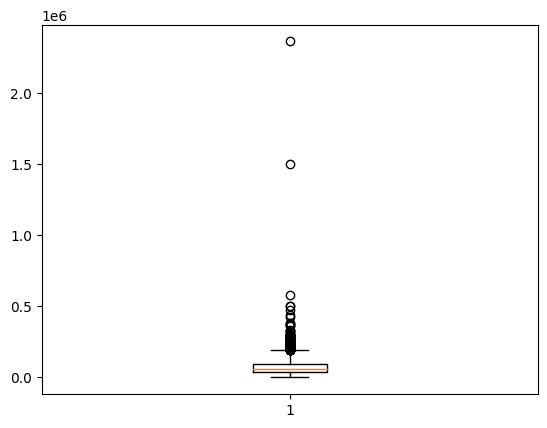

In [216]:
df1['km_driven'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.km_driven)


In [217]:
import numpy as np
column = 'km_driven'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 2.09%


In [218]:
df1[column].quantile([.90,.91,.92,.93,.94,.95,.95,.96,.97,.98,.99,1])

0.90     120000.00
0.91     120000.00
0.92     125980.16
0.93     136055.00
0.94     143000.00
0.95     150000.00
0.95     150000.00
0.96     160000.00
0.97     175000.00
0.98     195000.00
0.99     225000.00
1.00    2360457.00
Name: km_driven, dtype: float64

In [222]:
df1['new_km_driven']=df1['km_driven']
mask1 =df1['km_driven']>175000
df1['new_km_driven'][mask1]=df1['km_driven'].median()


<ipython-input-222-1d67cc4d1b8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_km_driven'][mask1]=df1['km_driven'].median()


In [223]:
import numpy as np
column = 'new_km_driven'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")


Percentage of data with outliers: 0.23%


### 5. seats

In [224]:
df1['seats'].value_counts(sort=True)

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [228]:
import numpy as np
column = 'seats'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 0.00%


### 6. new_engine

In [229]:
df1['new_engine'].value_counts()

1248.0    1017
1197.0     832
998.0      453
796.0      444
2179.0     389
          ... 
2835.0       1
1489.0       1
1422.0       1
2496.0       1
1950.0       1
Name: new_engine, Length: 121, dtype: int64

In [230]:
import numpy as np
column = 'new_engine'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 0.00%


### 6. new_mileage

In [231]:
df1['new_mileage'].value_counts()

18.90    225
19.70    173
18.60    164
21.10    158
17.00    133
        ... 
17.42      1
18.24      1
10.71      1
21.76      1
16.51      1
Name: new_mileage, Length: 381, dtype: int64

In [237]:
import numpy as np
column = 'new_mileage'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")
print(df1[column].mean()-df[column].median())

Percentage of data with outliers: 0.00%
0.11878335651953975


### 6. new_max_power

In [233]:
df1['new_max_power'].value_counts()

74.00     377
88.50     222
81.80     220
67.00     165
46.30     162
         ... 
58.33       1
68.40       1
169.00      1
170.63      1
135.10      1
Name: new_max_power, Length: 319, dtype: int64

In [234]:
import numpy as np
column = 'new_max_power'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 0.00%


In [235]:
print(df1['new_max_power'].mean()-df1['new_max_power'].median())

9.517918983822028


### Data cleaning done